In [1]:
#import package
import os
#Change directory
os.chdir("D:\Course Learning - UM\Sem 5\Data Science Project\Emotion Analysis for Long Covid\Datasets") 

#Basic library
import pandas as pd
import numpy as np

from datetime import datetime 
import time

#Data visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
pd.set_option('max_colwidth',2000)
df = pd.read_pickle("emotion_datasetV2.pkl")

In [2]:
df.head()

,Datetime,Tweet Id,Text,Username,Number of Likes,clean_tweet,emotion
0,2021-05-30 23:59:49+00:00,1399153605588836354,"As Australia begins the long journey to post-Covid recovery, we’re witnessing a candidate-driven market in software delivery. Learn more about our approach to hiring and what we found was most successful in this competitive market. 🚀\n\nhttps://t.co/cJPVemnQWZ\n\n#recruitment #hire",LexiconDigital_,1,australia begin journey postcovid recovery witness candidatedriven market software delivery learn approach hire find successful competitive market,analytical
1,2021-05-30 23:59:29+00:00,1399153522545942531,"@amyklobuchar @All100Senators Its not over, ever heard of Long CoVid? You are a Hot Mess Senator. https://t.co/OH5Zsw9yhJ",bargdaffy161,0,heard hot mess senator,neutral
2,2021-05-30 23:59:00+00:00,1399153402643288064,"@JoeBarri Because not all people have had the opportunity to get the vaccine in my area (high percentage want the vaccine, so lines are still long). Wearing a mask can prevent them from catching it from me since the vaccine doesn't mean I WONT get Covid 19",Miss_Naste,0,opportunity area high percentage want line wear mask prevent catch mean wont,neutral
3,2021-05-30 23:58:51+00:00,1399153364311724033,COVID shone a spotlight on for-profit long term care. Revera is one of the worst offenders. @psac_afpc members are demanding better pension investments. Join us. https://t.co/L4bAokgoQc,JSSBennett,0,shone spotlight forprofit care revera bad offender member demand good pension investment join,sadness
4,2021-05-30 23:58:37+00:00,1399153305218170882,"@kiroriwalanuj @swamiyogeshji @c_aashish @bharatvaarta @cfoc @capitalcalculus @CafeEconomics yes agree. Anil is sensible and looks at long-term neglect of health and education sector , people not following covid appropriate behaviour and failure at union and state level to organise and deal with the pandemic sensibly.",Vl17262873,2,yes agree anil sensible look longterm neglect health education sector follow appropriate behaviour failure union state level organise deal pandemic sensibly,neutral


In [3]:
# Shape
df.shape

(97098, 7)

In [4]:
# Datatypes
df.dtypes

Datetime           object
Tweet Id            int64
Text               object
Username           object
Number of Likes     int64
clean_tweet        object
emotion            object
dtype: object

In [5]:
# Check for Missing Values
df.isnull().sum()

Datetime           0
Tweet Id           0
Text               0
Username           0
Number of Likes    0
clean_tweet        0
emotion            0
dtype: int64

In [6]:
# Value Counts of Emotions
df['emotion'].value_counts()

analytical    36530
sadness       19822
neutral       18031
tentative      7959
joy            5957
confident      4791
fear           2610
anger          1398
Name: emotion, dtype: int64

<AxesSubplot:>

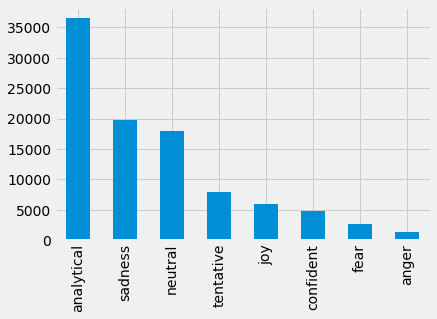

In [7]:
# Value Counts of Emotions
df['emotion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='emotion', ylabel='count'>

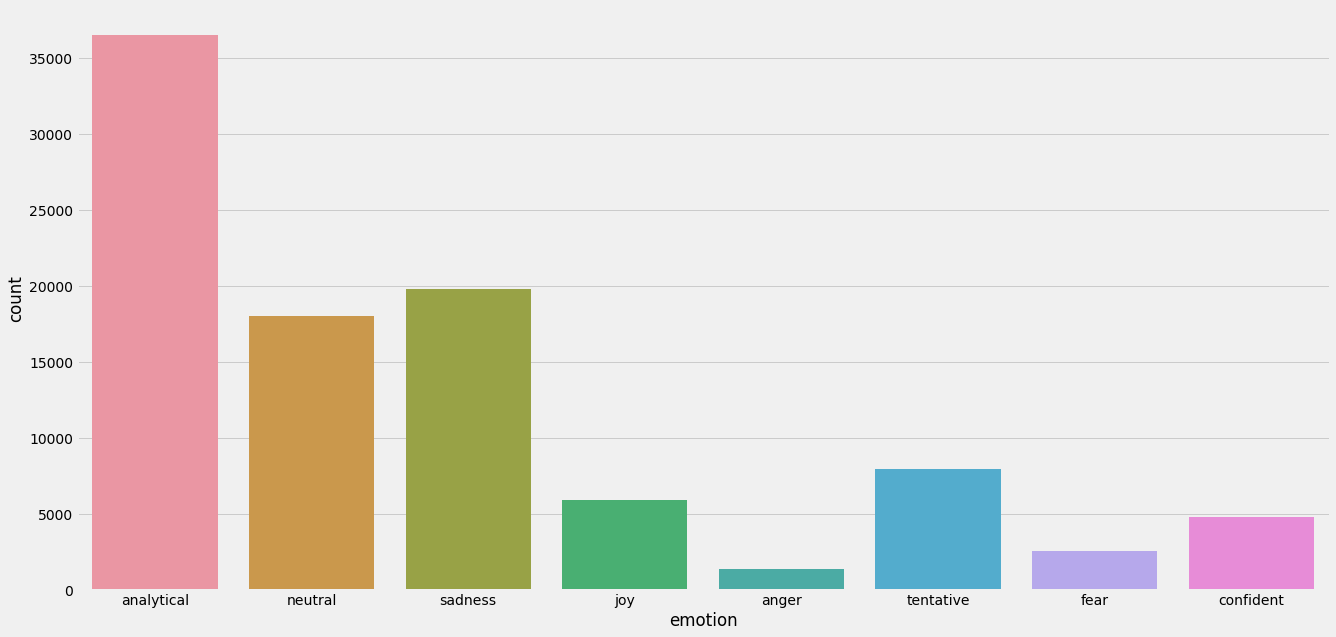

In [8]:
# New Method
plt.figure(figsize=(20,10)) #Plot a bigger figure
sns.countplot(x='emotion',data=df)

### Exploration
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion
    - Wordcloud
    

In [9]:
# Sentiment Analysis
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

df['Sentiment'] = df['clean_tweet'].apply(get_sentiment)

In [10]:
df['Sentiment'].value_counts()

Positive    42436
Negative    28782
Neutral     25880
Name: Sentiment, dtype: int64

In [11]:
# Compare our Emotion vs Sentiment
df.groupby(['emotion','Sentiment']).size()

emotion     Sentiment
analytical  Negative     10139
            Neutral       9851
            Positive     16540
anger       Negative       933
            Neutral        200
            Positive       265
confident   Negative      1196
            Neutral        635
            Positive      2960
fear        Negative      1141
            Neutral        565
            Positive       904
joy         Negative       415
            Neutral        786
            Positive      4756
neutral     Negative      4096
            Neutral       7143
            Positive      6792
sadness     Negative      8528
            Neutral       4492
            Positive      6802
tentative   Negative      2334
            Neutral       2208
            Positive      3417
dtype: int64

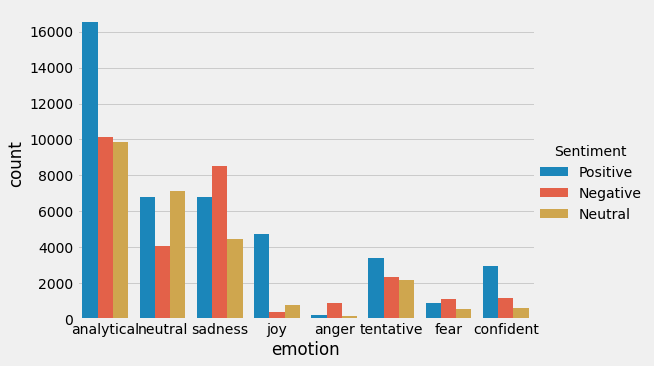

In [12]:
sns.catplot(x='emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

# Keyword Extraction
+ Extract most commonest words per class of emotion

# Corpus

In [13]:
emotion = df['emotion'].unique().tolist()
emotion

['analytical',
 'neutral',
 'sadness',
 'joy',
 'anger',
 'tentative',
 'fear',
 'confident']

In [14]:
data_combined = pd.DataFrame(index = emotion)

In [15]:
data_combined

""
analytical
neutral
sadness
joy
anger
tentative
fear
confident


In [16]:
for i in range(0, len(emotion)):
    print(i)
    print(emotion[i])

0
analytical
1
neutral
2
sadness
3
joy
4
anger
5
tentative
6
fear
7
confident


In [17]:
def combine_text(emotion):
    '''Takes a list of text and combines them into one large chunk of text.'''
    emotion_list = df[df["emotion"] == emotion]['clean_tweet'].tolist()
    combined_text = ' '.join(emotion_list)
    return combined_text

In [18]:
data_combined.loc[["sadness"],["clean_tweet"]] = combine_text("sadness")

In [19]:
for i in range(0, len(emotion)):
    data_combined.loc[[emotion[i]],["clean_tweet"]] = combine_text(emotion[i])

In [20]:
data_combined

,clean_tweet
analytical,australia begin journey postcovid recovery witness candidatedriven market software delivery learn approach hire find successful competitive market base seattle fan reader wife start direct sale frozen sourdough pizza company kind perfect food way go shoot email order catch yes basic math mean death didnt die think ok overload hospital system hear justify away sorry santa form poetic story family enjoy spite medical expert immunity last get vaccination effectively reduce severe illness hospitalization find vax site near visit wish healing condolence lose loved one health consequence post fyii graduate political science longterm incremental policy person kill dems reckon go find shocked soon inaction go lead new civil war defies belief lose live live inc child govt continue suppress truth manipulate potentially live esp possibly transmissible variant play vaccinate wont clinical trial participate proven safe effective idea efficacy effect seriously question effectiveness get shameful postcode lottery leave patient wait month treatment independent biobank establish doherty institute thanks million enable scientist well understand immune response longterm effect vaccine apparently healthy folk think disability chronic illness happen maybe longterm health effect inequality highlight pandemic start think carefully grattans foray immigration policy decision close door strong national interest framework border closure provide unique opportunity rethink facebook singlehandedly endanger democracy big source disinformation take self control argue day point recovery end patient discharge hospital imperative public outpatient community base rehab program fund accessible pm say ago learn live plan care religious ideology influence decision ridiculous clarify frightim vaccinate real prolonged contact overwhelmingness lot problem familiar age care staff shouldve upmost priority ago liberal govt busy spruiking lead post recovery hope reason new normal necessary...
neutral,heard hot mess senator opportunity area high percentage want line wear mask prevent catch mean wont yes agree anil sensible look longterm neglect health education sector follow appropriate behaviour failure union state level organise deal pandemic sensibly wake half fever dream happen festival post sport stadium mass shooting travel start llc men black flash thing flu shot mandatory health worker lockdown anymore enter age care facility evidence flu jab return care vaccination oh totally relate vent sense lot meet who deal consider virus hoax reservation vaccine load garbage vp unprofessional unfit tell american enjoy weekend traditionally enjoyed word easily apply trump unpatriotic republican congress see house surreal concern aside change camera angle get expect weirder wwe change thunderdome mental health crisis news coronavirus update potential breakthrough longhaulers smell word care public health theyre make money hell let tourist come money let chip fall frig wait thing improve think wed deal polio mean go deal as go find little pocket vulnerable sustain aside typhoid mary age karen ngl try process fact cat doc week coma he recover ffs rehabilitation go fully vaccinate travel test quarantine wear mask cdc say havent hug grandma poppop bc mention include child deal number young healthy get case tiny experience longterm symptom tiny fraction laughable believe long bc look obviously false fully test genetic modification past thing small pox give harmless version cow pox create immune response vaccine completely new untested infect immunise say state yeah provide free psychology chiro naturopath prescription supplement etc study small airway acute disease small airways longcovid oh sure country digital identity strategy singapore pretty far ahead ahead govt afaik get consider passport digital id goal possible limited draft talented college baseball hog run impressive set inflammatory disorder death hyper reaction mrna key live stay heal...
sadness,s

In [21]:
# Let's take a look at the docx for sadness
data_combined.clean_tweet.loc['sadness']

'shone spotlight forprofit care revera bad offender member demand good pension investment join  case number mean lot leave heart problem renal failure neurological issue cerebral blood clot ie stroke avoid die google yellow card reporting vaccine astra zeneca pfizer moderna  forgot omg pregnancy  erm wear mask day admit wrong vietnam source questionable believe scientific figure think died test invalid medical test  get dealt w properly live w return capacity deal w rest health issue sideline slow fail attempt live w governmentcovid stop issue get attention deserve  em suffer lot supply chain rely market operate normally wont happen till central bank look price pressure transitory  child catch able medical help month worth government hide  approach month deal effect make eat taste shit soap  feel sorry condition unfortunately pandemic bad conditionlong stupid  series drag end early hope organization able adapt postcovid thing bore term anime game day unfortunate circumstance  mean weve

### Corpus

In [22]:
# Let's add the emotion columns as well
full_emotions = emotion

data_combined['emotion'] = full_emotions
data_combined

,clean_tweet,emotion
analytical,australia begin journey postcovid recovery witness candidatedriven market software delivery learn approach hire find successful competitive market base seattle fan reader wife start direct sale frozen sourdough pizza company kind perfect food way go shoot email order catch yes basic math mean death didnt die think ok overload hospital system hear justify away sorry santa form poetic story family enjoy spite medical expert immunity last get vaccination effectively reduce severe illness hospitalization find vax site near visit wish healing condolence lose loved one health consequence post fyii graduate political science longterm incremental policy person kill dems reckon go find shocked soon inaction go lead new civil war defies belief lose live live inc child govt continue suppress truth manipulate potentially live esp possibly transmissible variant play vaccinate wont clinical trial participate proven safe effective idea efficacy effect seriously question effectiveness get shameful postcode lottery leave patient wait month treatment independent biobank establish doherty institute thanks million enable scientist well understand immune response longterm effect vaccine apparently healthy folk think disability chronic illness happen maybe longterm health effect inequality highlight pandemic start think carefully grattans foray immigration policy decision close door strong national interest framework border closure provide unique opportunity rethink facebook singlehandedly endanger democracy big source disinformation take self control argue day point recovery end patient discharge hospital imperative public outpatient community base rehab program fund accessible pm say ago learn live plan care religious ideology influence decision ridiculous clarify frightim vaccinate real prolonged contact overwhelmingness lot problem familiar age care staff shouldve upmost priority ago liberal govt busy spruiking lead post recovery hope reason new normal necessary...,analytical
neutral,heard hot mess senator opportunity area high percentage want line wear mask prevent catch mean wont yes agree anil sensible look longterm neglect health education sector follow appropriate behaviour failure union state level organise deal pandemic sensibly wake half fever dream happen festival post sport stadium mass shooting travel start llc men black flash thing flu shot mandatory health worker lockdown anymore enter age care facility evidence flu jab return care vaccination oh totally relate vent sense lot meet who deal consider virus hoax reservation vaccine load garbage vp unprofessional unfit tell american enjoy weekend traditionally enjoyed word easily apply trump unpatriotic republican congress see house surreal concern aside change camera angle get expect weirder wwe change thunderdome mental health crisis news coronavirus update potential breakthrough longhaulers smell word care public health theyre make money hell let tourist come money let chip fall frig wait thing improve think wed deal polio mean go deal as go find little pocket vulnerable sustain aside typhoid mary age karen ngl try process fact cat doc week coma he recover ffs rehabilitation go fully vaccinate travel test quarantine wear mask cdc say havent hug grandma poppop bc mention include child deal number young healthy get case tiny experience longterm symptom tiny fraction laughable believe long bc look obviously false fully test genetic modification past thing small pox give harmless version cow pox create immune response vaccine completely new untested infect immunise say state yeah provide free psychology chiro naturopath prescription supplement etc study small airway acute disease small airways longcovid oh sure country digital identity strategy singapore pretty far ahead ahead govt afaik get consider passport digital id goal possible limited draft talented college baseball hog run impressive set inflammatory disorder death hyper reaction mrna key live sta

In [23]:
# Let's pickle it for later use
data_combined.to_pickle("emotion_corpusV3.pkl")

# Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [24]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_combined.clean_tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_combined.index
data_dtm

,aa,aaa,aaaa,aaaaa,aaaaaaaaaaaaa,aaaaaaand,aaaaaargh,aaaaand,aaaah,aaaand,...,zwane,zwithu,zws,zyada,zydus,zyesamirlf,zyrtec,zywicki,zz,zzzzzzzz
analytical,3,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
neutral,7,1,0,0,0,0,1,0,0,1,...,0,1,0,1,1,0,0,1,0,0
sadness,4,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
joy,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anger,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tentative,1,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
confident,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Let's pickle it for later use
#data_dtm.to_pickle("dtm.pkl")

In [26]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
#data_clean.to_pickle('data_clean.pkl')
#pickle.dump(cv, open("cv.pkl", "wb"))

#### Note: Due to large dataset, my computer is running out of memory when perfoming ```toarray()```. Therefore, upcoming code will only ```fit_transform``` the dataset instead of ```toarrray()``` again

# Most Common Words

In [27]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,analytical,neutral,sadness,joy,anger,tentative,fear,confident
aa,3,7,4,0,1,1,0,1
aaa,1,1,0,2,0,2,0,3
aaaa,0,0,0,0,0,1,0,0
aaaaa,0,0,0,0,0,1,0,0
aaaaaaaaaaaaa,0,0,0,1,0,0,0,0


In [28]:
# Find the top 30 words appear in each emotions
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'analytical': [('covid', 37173),
  ('long', 31346),
  ('effect', 9248),
  ('term', 8723),
  ('vaccine', 8560),
  ('know', 8264),
  ('people', 7182),
  ('amp', 4096),
  ('think', 3931),
  ('longterm', 3320),
  ('risk', 3051),
  ('time', 3014),
  ('child', 2737),
  ('case', 2701),
  ('like', 2643),
  ('health', 2537),
  ('need', 2511),
  ('death', 2438),
  ('year', 2397),
  ('vaccinate', 2383),
  ('kid', 2143),
  ('symptom', 2058),
  ('cause', 2047),
  ('virus', 2033),
  ('infection', 1984),
  ('study', 1907),
  ('die', 1847),
  ('work', 1664),
  ('want', 1664),
  ('problem', 1657)],
 'neutral': [('covid', 17898),
  ('long', 15675),
  ('vaccine', 2809),
  ('people', 2547),
  ('amp', 2362),
  ('time', 1870),
  ('term', 1367),
  ('need', 1288),
  ('year', 1134),
  ('like', 1124),
  ('vaccinate', 1064),
  ('case', 1047),
  ('test', 987),
  ('child', 952),
  ('kid', 950),
  ('work', 935),
  ('symptom', 925),
  ('health', 924),
  ('day', 869),
  ('say', 862),
  ('mask', 854),
  ('new', 806),

In [29]:
# Print the top 15 words used in each emotions
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

analytical
covid, long, effect, term, vaccine, know, people, amp, think, longterm, risk, time, child, case
---
neutral
covid, long, vaccine, people, amp, time, term, need, year, like, vaccinate, case, test, child
---
sadness
covid, long, people, die, amp, death, term, suffer, time, year, symptom, vaccine, like, work
---
joy
covid, long, amp, time, good, year, day, people, great, new, health, vaccine, like, work
---
anger
covid, long, fuck, people, shit, time, like, vaccine, amp, know, want, mask, idiot, need
---
tentative
covid, long, like, people, vaccine, hope, term, time, likely, chance, maybe, believe, amp, know
---
fear
covid, long, fear, people, amp, risk, vaccine, worry, term, scar, time, symptom, vaccinate, like
---
confident
covid, long, people, vaccine, sure, test, positive, time, actually, amp, term, absolutely, case, know
---


In [30]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each emotions
words = []
for emotions_common in data.columns:
    top = [word for (word, count) in top_dict[emotions_common]]
    for t in top:
        words.append(t)
        
words

['covid',
 'long',
 'effect',
 'term',
 'vaccine',
 'know',
 'people',
 'amp',
 'think',
 'longterm',
 'risk',
 'time',
 'child',
 'case',
 'like',
 'health',
 'need',
 'death',
 'year',
 'vaccinate',
 'kid',
 'symptom',
 'cause',
 'virus',
 'infection',
 'study',
 'die',
 'work',
 'want',
 'problem',
 'covid',
 'long',
 'vaccine',
 'people',
 'amp',
 'time',
 'term',
 'need',
 'year',
 'like',
 'vaccinate',
 'case',
 'test',
 'child',
 'kid',
 'work',
 'symptom',
 'health',
 'day',
 'say',
 'mask',
 'new',
 'risk',
 'longterm',
 'know',
 'care',
 'want',
 'patient',
 'month',
 'wait',
 'covid',
 'long',
 'people',
 'die',
 'amp',
 'death',
 'term',
 'suffer',
 'time',
 'year',
 'symptom',
 'vaccine',
 'like',
 'work',
 'child',
 'know',
 'care',
 'month',
 'kid',
 'need',
 'bad',
 'case',
 'risk',
 'day',
 'vaccinate',
 'hospital',
 'health',
 'life',
 'say',
 'damage',
 'covid',
 'long',
 'amp',
 'time',
 'good',
 'year',
 'day',
 'people',
 'great',
 'new',
 'health',
 'vaccine',
 '

In [31]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('covid', 8),
 ('long', 8),
 ('vaccine', 8),
 ('know', 8),
 ('people', 8),
 ('amp', 8),
 ('time', 8),
 ('need', 8),
 ('like', 7),
 ('year', 7),
 ('term', 6),
 ('risk', 6),
 ('vaccinate', 6),
 ('symptom', 6),
 ('work', 6),
 ('child', 5),
 ('case', 5),
 ('health', 5),
 ('kid', 5),
 ('die', 5),
 ('day', 5),
 ('think', 4),
 ('death', 4),
 ('test', 4),
 ('month', 4),
 ('thing', 4),
 ('want', 3),
 ('say', 3),
 ('care', 3),
 ('effect', 2),
 ('longterm', 2),
 ('virus', 2),
 ('infection', 2),
 ('mask', 2),
 ('new', 2),
 ('wait', 2),
 ('life', 2),
 ('good', 2),
 ('come', 2),
 ('cause', 1),
 ('study', 1),
 ('problem', 1),
 ('patient', 1),
 ('suffer', 1),
 ('bad', 1),
 ('hospital', 1),
 ('damage', 1),
 ('great', 1),
 ('love', 1),
 ('way', 1),
 ('help', 1),
 ('thank', 1),
 ('happy', 1),
 ('live', 1),
 ('best', 1),
 ('look', 1),
 ('week', 1),
 ('today', 1),
 ('fuck', 1),
 ('shit', 1),
 ('idiot', 1),
 ('angry', 1),
 ('stupid', 1),
 ('hell', 1),
 ('bullshit', 1),
 ('stop', 1),
 ('hate', 1),
 ('tell',

In [32]:
# If more than half of the emotions have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['covid',
 'long',
 'vaccine',
 'know',
 'people',
 'amp',
 'time',
 'need',
 'like',
 'year',
 'term',
 'risk',
 'vaccinate',
 'symptom',
 'work']

#### At this part, we can return back to the _`data cleaning step`_ and clean up the dataset for round 2 to remove some common stop words because these stopwords will not help in the model building, even will worsen the performance of model.

In [33]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('emotion_corpusV3.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words, min_df=0.01) #0.01~0.05 #min_df remove some rare words
data_cv = cv.fit_transform(data_clean.clean_tweet)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


In [34]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

from wordcloud import WordCloud

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(240,100%%, %d%%)" % np.random.randint(45,55))

wc = WordCloud(stopwords=stop_words, background_color="white", color_func = grey_color_func,
               max_font_size=150, random_state=42, max_words=50, collocations=False)

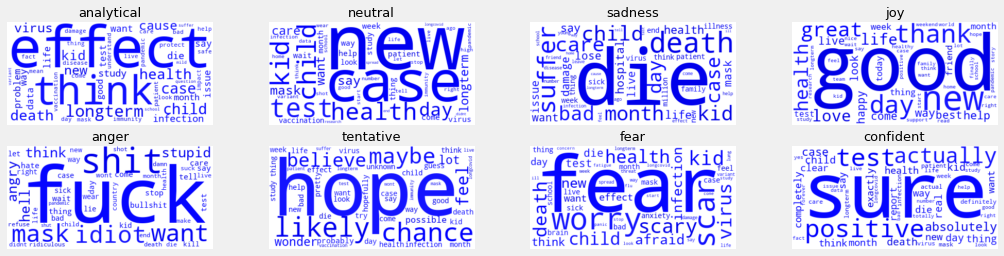

In [35]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]  #16,6 #40,40

full_names = emotion

# Create subplots for each emotion
for index, emotion in enumerate(data.columns):
    wc.generate(data_clean.clean_tweet[emotion])
    
    plt.subplot(3, 4, index+1)  #3,4 #4,2
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], fontsize = 13)
    
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_text_ngrams(corpus, ngrams=(1,1), nr=None):
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

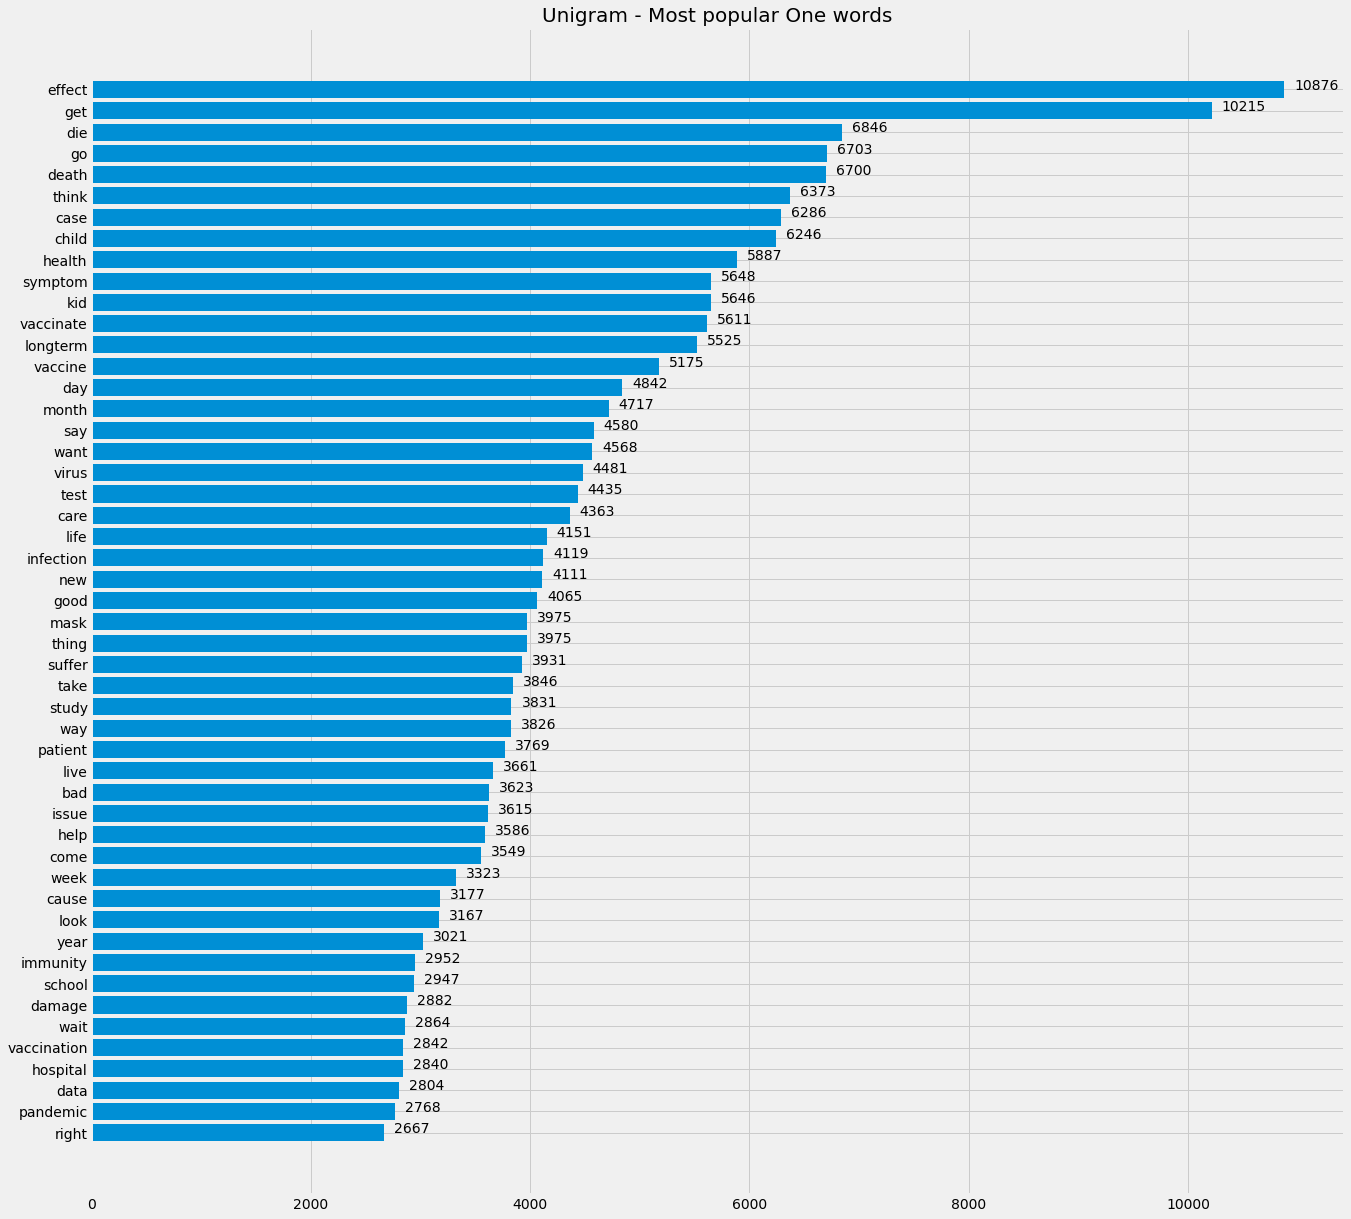

In [37]:
# Unigrams - Most Popular One Keyword
top_text_bigrams = get_top_text_ngrams(data_clean.clean_tweet, ngrams=(1,1), nr=50)
top_text_bigrams = sorted(top_text_bigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_bigrams)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Unigram - Most popular One words", fontsize=20)
for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

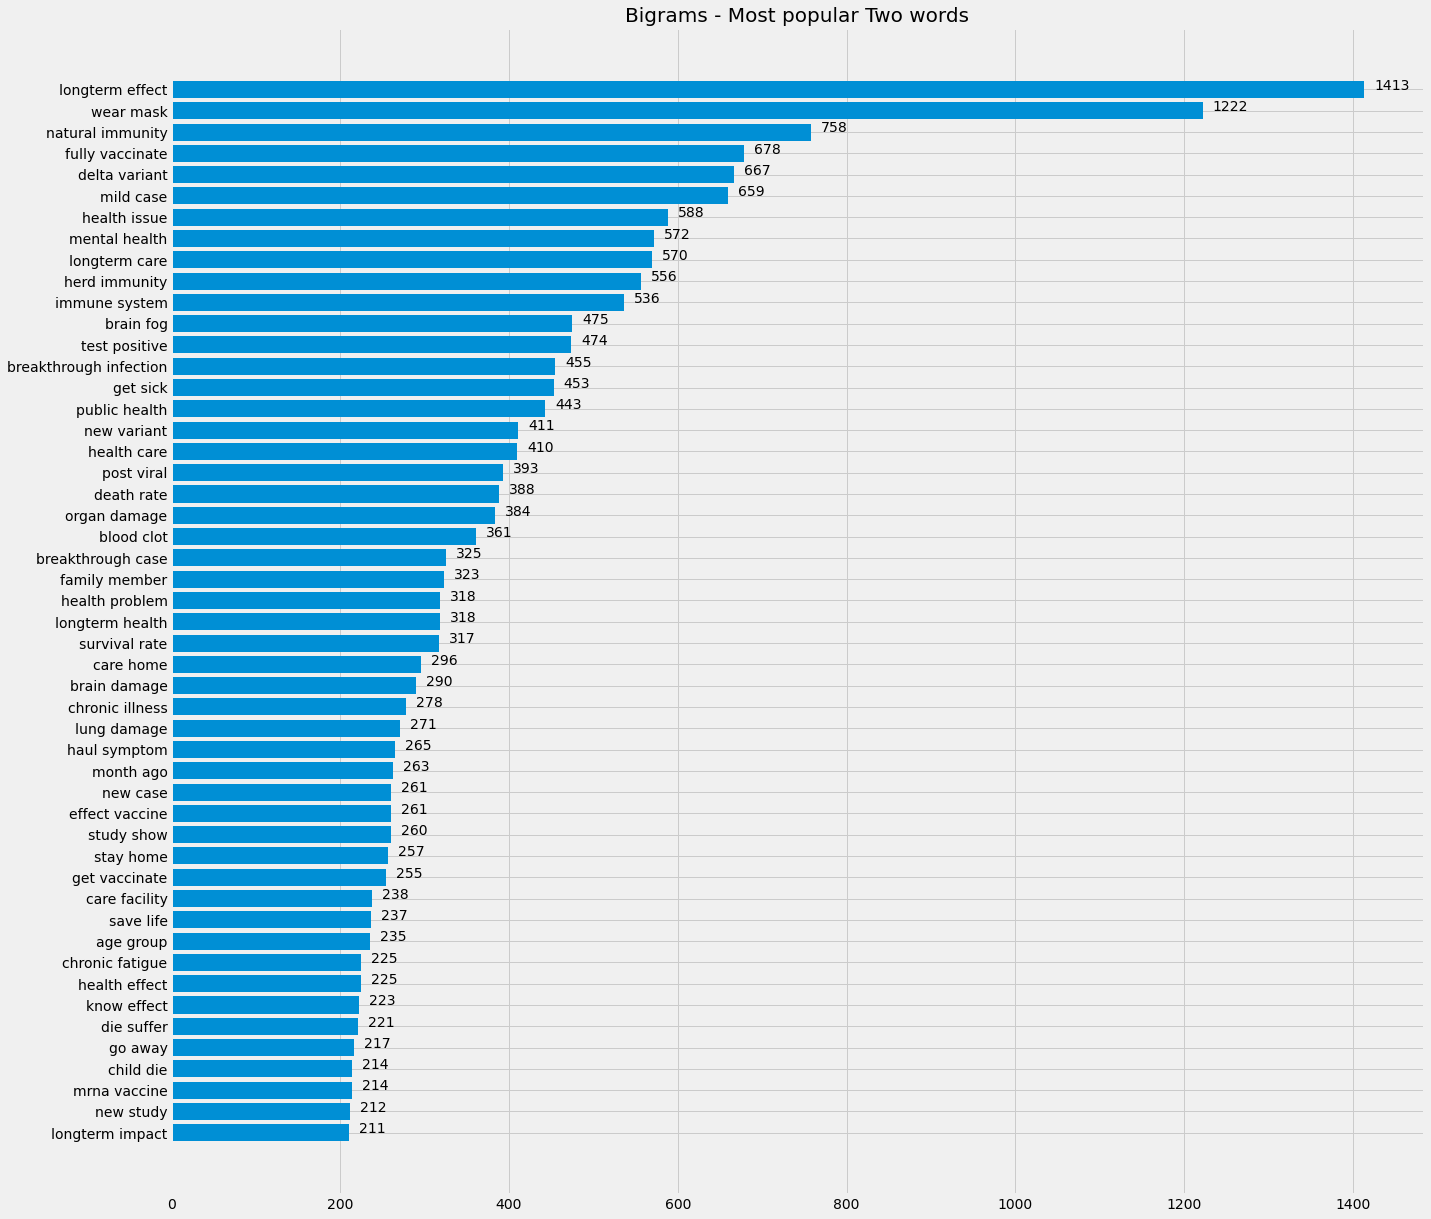

In [38]:
# Bigrams - Most Popular Two Keyword
top_text_bigrams = get_top_text_ngrams(data_clean.clean_tweet, ngrams=(2,2), nr=50)
top_text_bigrams = sorted(top_text_bigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_bigrams)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Bigrams - Most popular Two words", fontsize=20)

for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

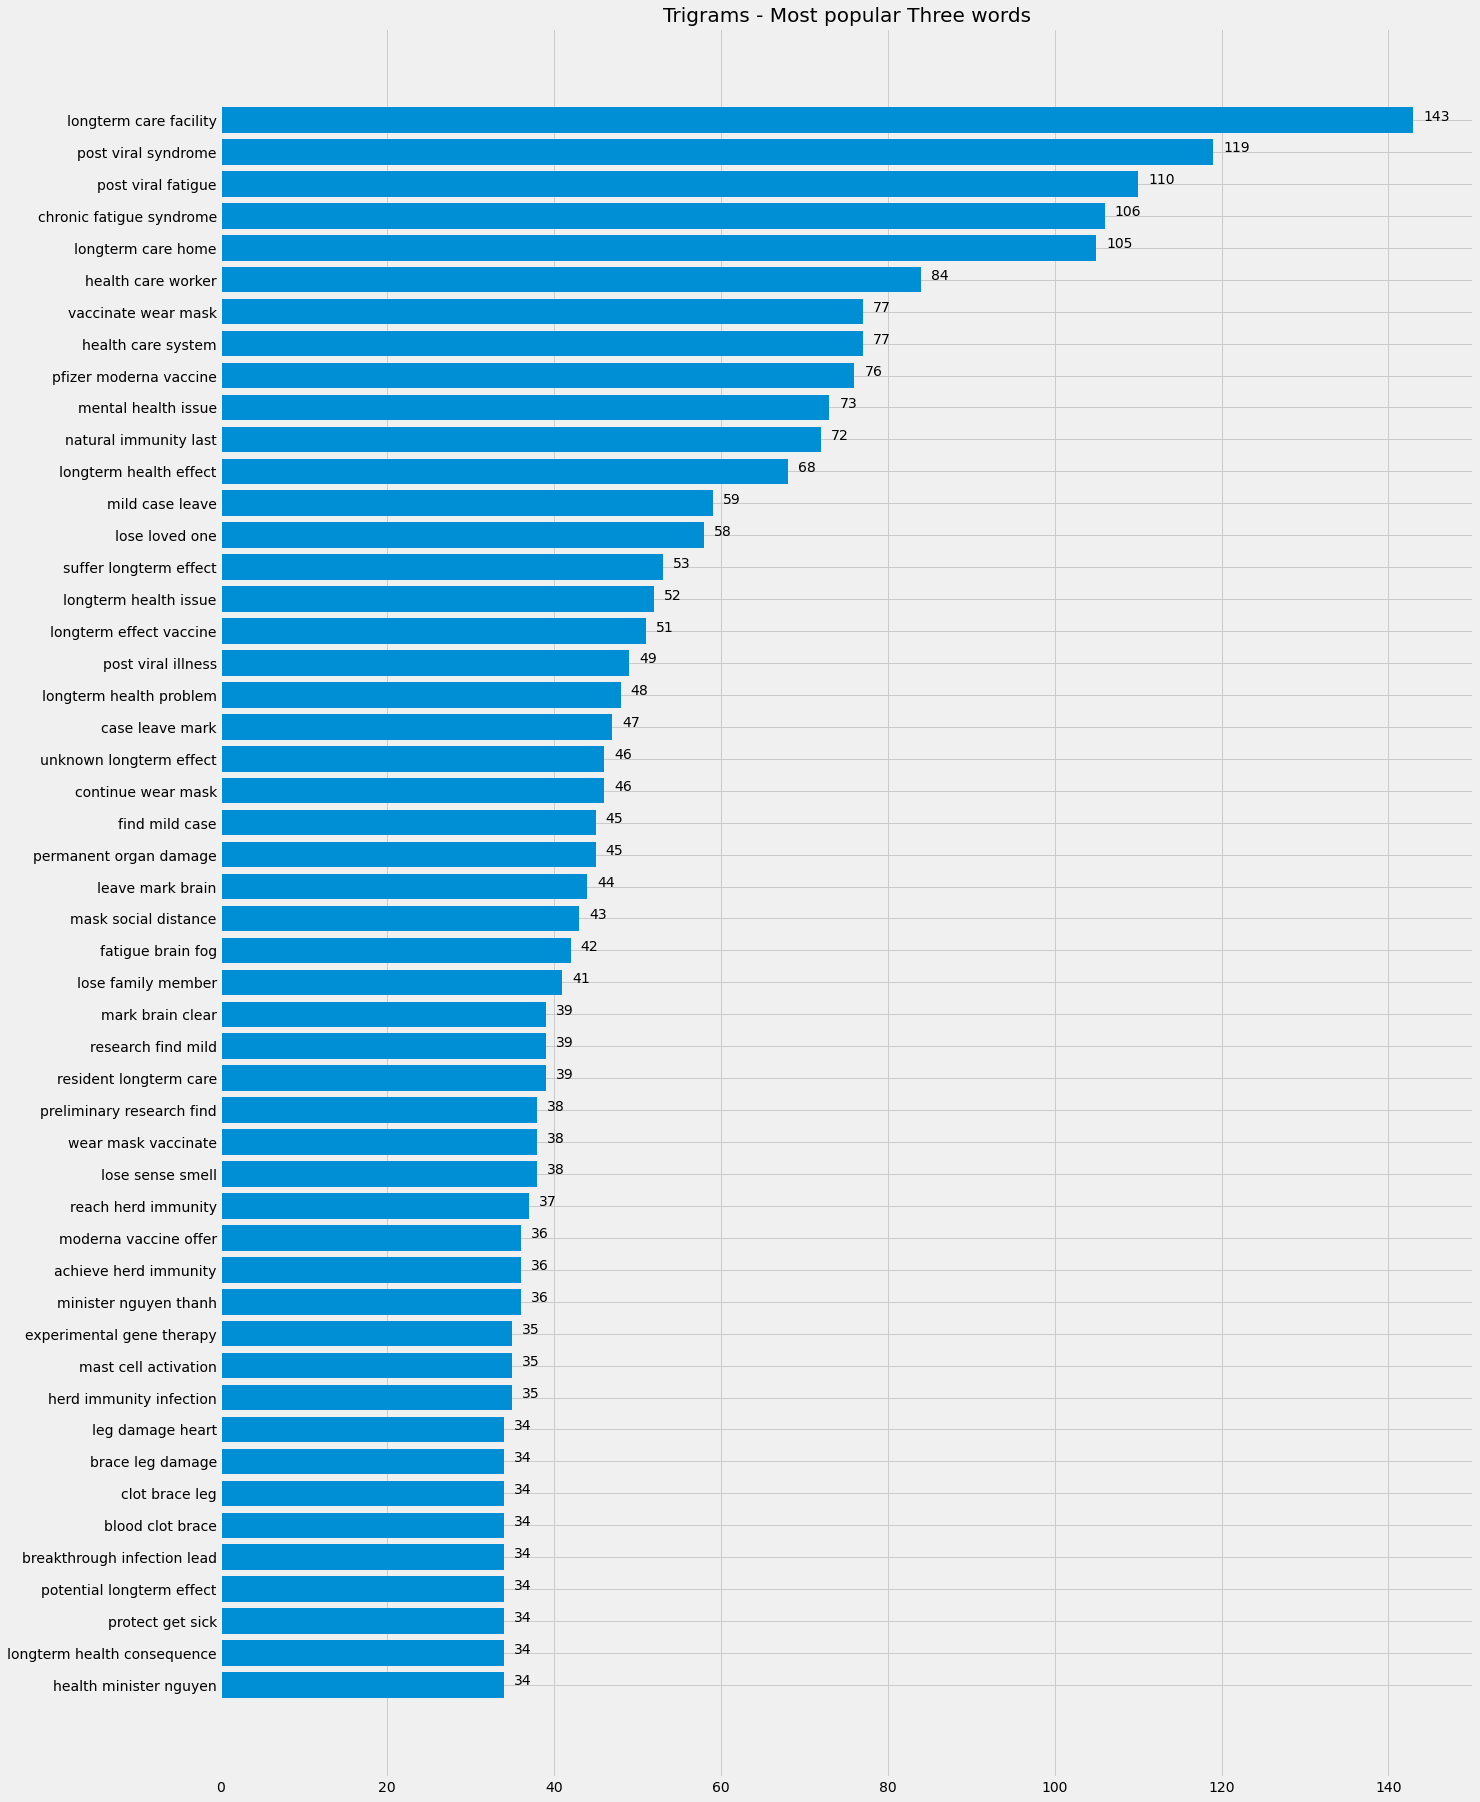

In [39]:
# Bigrams - Most Popular Three Keyword
top_text_bigrams = get_top_text_ngrams(data_clean.clean_tweet, ngrams=(3,3), nr=50)
top_text_bigrams = sorted(top_text_bigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_bigrams)
plt.figure(figsize=(20,30))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Trigrams - Most popular Three words", fontsize=20)
for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

# By Months

#### Read cvs and convert Date column directly to Date dtypes

    d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
    df = pd.read_csv('.csv', parse_dates= 'Datetime'],date_parser=d_parser)


In [40]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [41]:
df.dtypes

Datetime           datetime64[ns, UTC]
Tweet Id                         int64
Text                            object
Username                        object
Number of Likes                  int64
clean_tweet                     object
emotion                         object
Sentiment                       object
dtype: object

In [42]:
df.set_index('Datetime', inplace=True)
df['2021-05':'2021-06']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,Tweet Id,Text,Username,Number of Likes,clean_tweet,emotion,Sentiment
Datetime,,,,,,,
2021-05-30 23:59:49+00:00,1399153605588836354,"As Australia begins the long journey to post-Covid recovery, we’re witnessing a candidate-driven market in software delivery. Learn more about our approach to hiring and what we found was most successful in this competitive market. 🚀\n\nhttps://t.co/cJPVemnQWZ\n\n#recruitment #hire",LexiconDigital_,1,australia begin journey postcovid recovery witness candidatedriven market software delivery learn approach hire find successful competitive market,analytical,Positive
2021-05-30 23:59:29+00:00,1399153522545942531,"@amyklobuchar @All100Senators Its not over, ever heard of Long CoVid? You are a Hot Mess Senator. https://t.co/OH5Zsw9yhJ",bargdaffy161,0,heard hot mess senator,neutral,Positive
2021-05-30 23:59:00+00:00,1399153402643288064,"@JoeBarri Because not all people have had the opportunity to get the vaccine in my area (high percentage want the vaccine, so lines are still long). Wearing a mask can prevent them from catching it from me since the vaccine doesn't mean I WONT get Covid 19",Miss_Naste,0,opportunity area high percentage want line wear mask prevent catch mean wont,neutral,Negative
2021-05-30 23:58:51+00:00,1399153364311724033,COVID shone a spotlight on for-profit long term care. Revera is one of the worst offenders. @psac_afpc members are demanding better pension investments. Join us. https://t.co/L4bAokgoQc,JSSBennett,0,shone spotlight forprofit care revera bad offender member demand good pension investment join,sadness,Positive
2021-05-30 23:58:37+00:00,1399153305218170882,"@kiroriwalanuj @swamiyogeshji @c_aashish @bharatvaarta @cfoc @capitalcalculus @CafeEconomics yes agree. Anil is sensible and looks at long-term neglect of health and education sector , people not following covid appropriate behaviour and failure at union and state level to organise and deal with the pandemic sensibly.",Vl17262873,2,yes agree anil sensible look longterm neglect health education sector follow appropriate behaviour failure union state level organise deal pandemic sensibly,neutral,Positive
...,...,...,...,...,...,...,...
2021-06-25 08:53:39+00:00,1408347645064658947,"Its easier to pretend children won't catch and spread covid, or long covid doesn't exist carring potential to cause long term damage to health well-being and life chances. However it is not just the person fooling themselves that are being put at risk.",Tall_Paul_05,22,easy pretend child wont catch spread exist carring potential cause damage health wellbeing life chance person fool,sadness,Positive
2021-06-25 08:53:20+00:00,1408347565922439168,@ProfPHansen @FaktaHoldninger @StabellBenn @journalistendk @MortenElsoe @stinuslindgreen @noelTbrewer @ThSenderovitz @Sannebanan @dyrby @FormidlerL @LMSTErichsen @LMSTdk @videnskabdk I don’t see @StabellBenn being constantly pessimistic. I see her trying to navigate in a spectrum between science and politics. The fact is there were real concerns that the vaccine would become mandatory. We still see it with long Covid and herd immunity as the new threat.,Westegnen,5,constantly pessimistic try navigate spectrum science politics fact real concern mandatory herd immunity new threat,analytical,Positive
2021-06-25 08:52:44+00:00,1408347416831614976,Still a long way to go approximately 10 billion doses are required. 25 % of work done but with vast difference among 179 countries too @covid-19 @VaccinesToday @WHO @raboazhar03 @p4pakipower @fslsltn https://t.co/gUjgfwgq60,manzoorsohail,0,way approximately billion dos require vast difference country,tentative,Negative


In [43]:
# Pre-clean For round2
df.clean_tweet = df.clean_tweet.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  # Remove the CWD from sys.path while we load stuff.


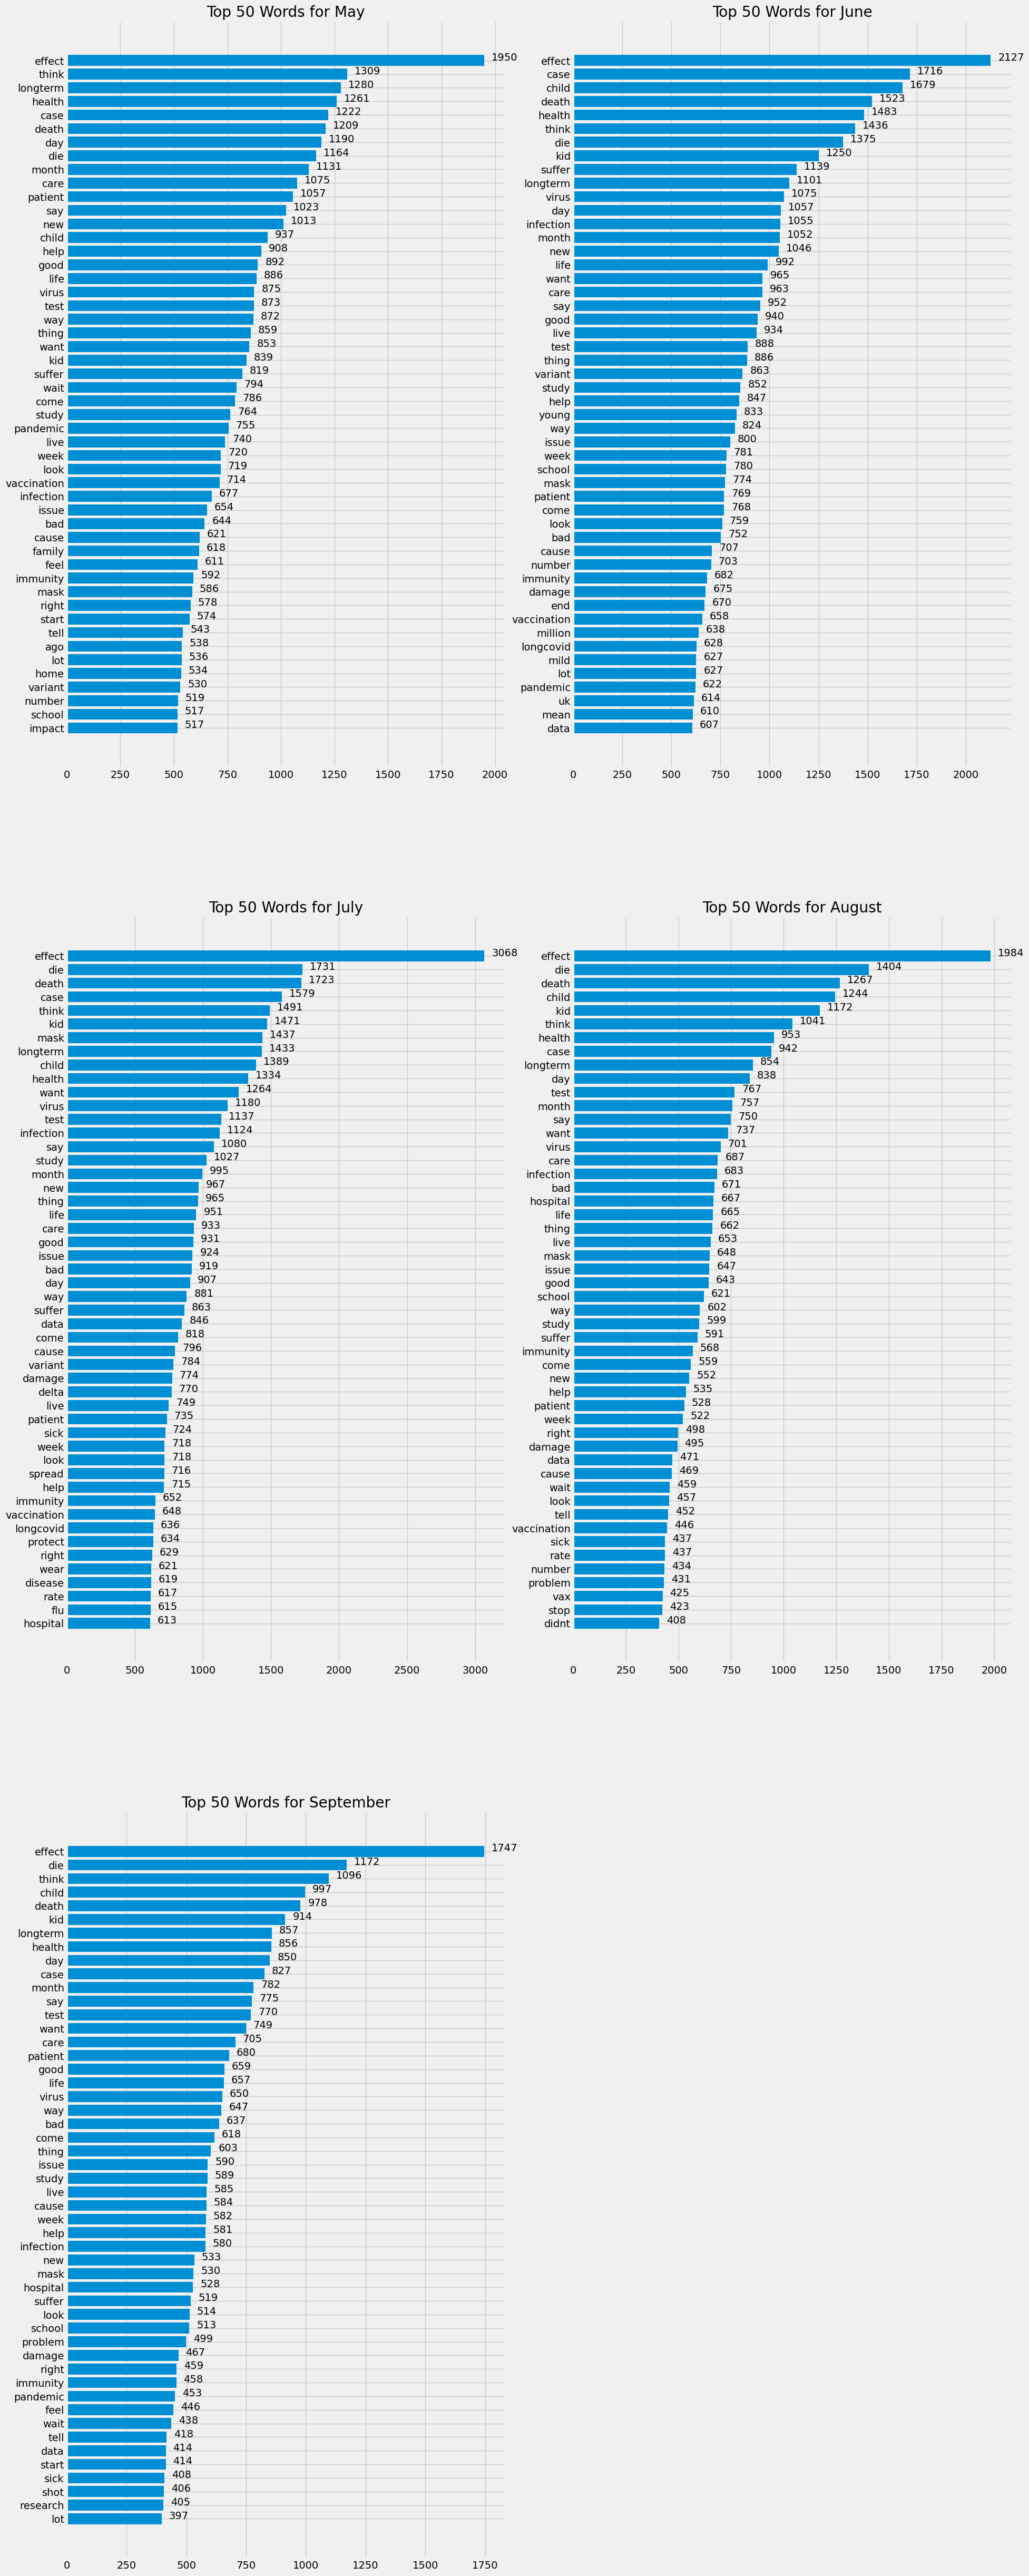

In [44]:
# Unigrams - Top 20 Keywords for each months
months_name = ['May','June','July','August','September']
months = ['2021-05','2021-06','2021-07','2021-08','2021-09']

fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)
plt.tight_layout(pad=4.0)
#plt.subplots_adjust(right=1.2)

for i in range(0, len(months)):
    top_text_bigrams = get_top_text_ngrams(df[months[i]].clean_tweet, ngrams=(1,1), nr=50)
    top_text_bigrams = sorted(top_text_bigrams, key=lambda x:x[1], reverse=False)
    x, y = zip(*top_text_bigrams)
    plt.subplot(3, 2, i+1)
    #plt.figure(figsize=(18,30))
    plt.barh(x,y,align="center")
    for x,y in zip(x,y):
        label = "{:}".format(y)
        plt.annotate(label, # this is the text
                     (y,x), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(10,0)) # distance from text to points (x,y)

    plt.title("Top 50 Words for {}".format(months_name[i])) #fontsize=20, rotation=45


plt.show()

## Find Top 10 keywords Trends

In [45]:
line_chart_data = df.copy()
#line_chart_data['Datetime'] = pd.to_datetime(line_chart_data['Datetime'])
line_chart_data['TrendsInMonth'] = line_chart_data.index.month_name()

In [46]:
line_chart_data.index.month_name()

Index(['May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May',
       ...
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September'],
      dtype='object', name='Datetime', length=97098)

In [47]:
line_chart_data.drop(['Tweet Id','Text','Username','Number of Likes','emotion','Sentiment'], axis=1, inplace=True)

In [48]:
line_chart_data

,clean_tweet,TrendsInMonth
Datetime,,
2021-05-30 23:59:49+00:00,australia begin journey postcovid recovery witness candidatedriven market software delivery learn approach hire successful competitive market,May
2021-05-30 23:59:29+00:00,heard hot mess senator,May
2021-05-30 23:59:00+00:00,opportunity area high percentage want line wear mask prevent catch mean wont,May
2021-05-30 23:58:51+00:00,shone spotlight forprofit care revera bad offender member demand good pension investment join,May
2021-05-30 23:58:37+00:00,yes agree anil sensible look longterm neglect health education sector follow appropriate behaviour failure union state level organise deal pandemic sensibly,May
...,...,...
2021-09-24 18:37:18+00:00,spent day bit pilani reach delhi semesterlong wait elder son anurag finally start campus life amid protocols chemical engineering dept nd,September
2021-09-24 18:36:30+00:00,coronavirus late uss medical research agency invest study,September
2021-09-24 18:36:25+00:00,sorry tweet massive karenoutburst school board meeting bitch month ago say ok lose kid freedom maskless apology,September


In [49]:
def combine_text_month(month):
    '''Takes a list of text and combines them into one large chunk of text.'''
    emotion_list = line_chart_data[line_chart_data["TrendsInMonth"] == month]['clean_tweet'].tolist()
    combined_text = ' '.join(emotion_list)
    return combined_text

month_list = ['May','June','July','August','September']
data_combined = pd.DataFrame(index = month_list)
for i in range(0, len(month_list)):
    data_combined.loc[[month_list[i]],["clean_tweet"]] = combine_text_month(month_list[i])

data_combined['Months'] = month_list

In [50]:
# Pickle data for line chart analysis
#data_combined.to_pickle("month_corpus.pkl")

In [51]:
# Find the top 10 words said by each emotion
top_dict = {}

for c in data.columns:
    
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

In [52]:
# Only interest in finding out the trends of these 10 words across each months
top_ten = ['longterm','child','vaccine', 'vaccinate', 'die', 'school', 'mask', 'delta', 'symptom', 'death']

In [53]:
trends_data = pd.DataFrame(columns=['Month','Counts','Words'])
trends_data

,Month,Counts,Words


In [54]:
# Counting the number of these 10 words in each months
for k, v in top_dict.items():
    test = dict(v)
    print("\n===",k,"===\n")
    for word in top_ten:
        print(word,": ",test[word])
        new_dict = {'Month':k, 'Counts': test[word], 'Words': word}
        trends_data = trends_data.append(new_dict,ignore_index = True)     


=== analytical ===

longterm :  3320
child :  2737
vaccine :  8560
vaccinate :  2383
die :  1847
school :  1036
mask :  1316
delta :  688
symptom :  2058
death :  2438

=== neutral ===

longterm :  787
child :  952
vaccine :  2809
vaccinate :  1064
die :  268
school :  569
mask :  854
delta :  365
symptom :  925
death :  327

=== sadness ===

longterm :  684
child :  1592
vaccine :  1763
vaccinate :  1285
die :  3927
school :  737
mask :  1042
delta :  435
symptom :  1940
death :  3114

=== joy ===

longterm :  167
child :  139
vaccine :  472
vaccinate :  216
die :  68
school :  153
mask :  150
delta :  72
symptom :  100
death :  42

=== anger ===

longterm :  23
child :  41
vaccine :  118
vaccinate :  64
die :  44
school :  32
mask :  93
delta :  19
symptom :  26
death :  38

=== tentative ===

longterm :  252
child :  366
vaccine :  1099
vaccinate :  463
die :  429
school :  173
mask :  230
delta :  103
symptom :  513
death :  382

=== fear ===

longterm :  115
child :  161
vaccine 

In [55]:
trends_data

,Month,Counts,Words
0,analytical,3320,longterm
1,analytical,2737,child
2,analytical,8560,vaccine
3,analytical,2383,vaccinate
4,analytical,1847,die
...,...,...,...
75,confident,132,school
76,confident,164,mask
77,confident,72,delta
78,confident,299,symptom


In [56]:
# Pickle the data of later use
#trends_data.to_pickle("month_trend.pkl")